In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.6.2
1.19.5


In [2]:
fashion_mnist= keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_labels.shape

(10000,)

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

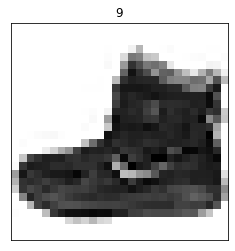

In [9]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(train_labels[0])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

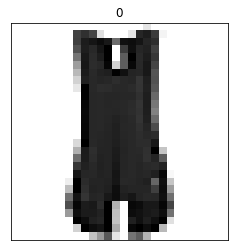

In [10]:
plt.imshow(train_images[4],cmap='gray_r')
plt.title(train_labels[4])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
class_names[2]

'Pullover'

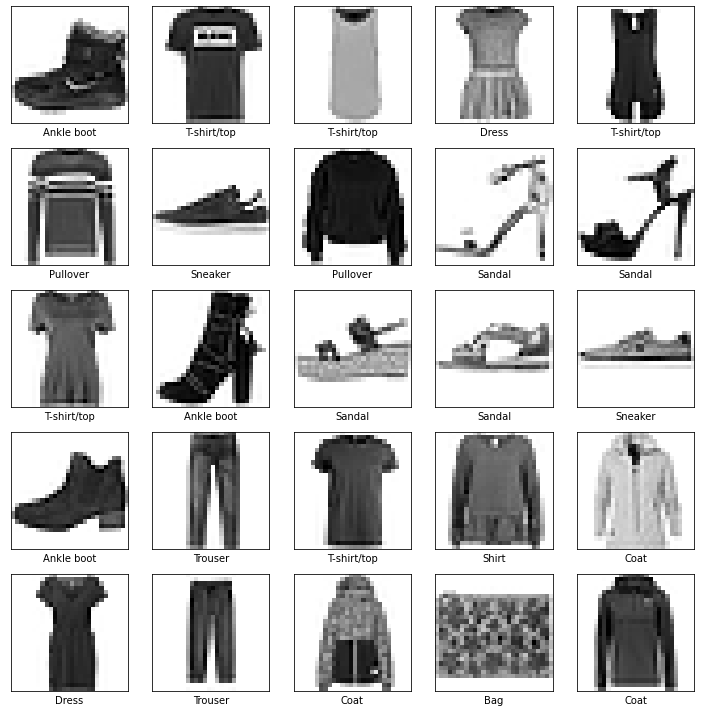

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap='gray_r')
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [15]:
#Normalization and casting
#Normalization- Converting ito normal distribution
#Casting- Converting variblefomone datatype to other
#Here we are coverting integer value intofloating value

In [16]:
train_images= train_images/255.0
test_images= test_images/255.0

In [17]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels,validation_split=0.2, epochs=50,verbose=1)
#Validation_split-0.2- 80% of the data is used to train the model and the rest 20% will be used to test the model
#Verbose- the choice that how you want to see the output of your Neural Network while it's training.

Epoch 1/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4900 - accuracy: 0.8246 - val_loss: 0.4060 - val_accuracy: 0.8534
Epoch 2/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3686 - accuracy: 0.8656 - val_loss: 0.3679 - val_accuracy: 0.8653
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3309 - accuracy: 0.8765 - val_loss: 0.3369 - val_accuracy: 0.8776
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3056 - accuracy: 0.8868 - val_loss: 0.3297 - val_accuracy: 0.8809
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2873 - accuracy: 0.8930 - val_loss: 0.3194 - val_accuracy: 0.8838
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2712 - accuracy: 0.8984 - val_loss: 0.3098 - val_accuracy: 0.8908
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2580 - accuracy: 0.9028 - val_loss: 0.3010 - val_ac

In [25]:
history.history

{'loss': [0.49000653624534607,
  0.3685949444770813,
  0.33087068796157837,
  0.30559805035591125,
  0.28734076023101807,
  0.27115994691848755,
  0.2579517960548401,
  0.24250899255275726,
  0.23610830307006836,
  0.22343148291110992,
  0.21419218182563782,
  0.20795032382011414,
  0.1998385637998581,
  0.19366510212421417,
  0.18781256675720215,
  0.17928025126457214,
  0.17274409532546997,
  0.16898319125175476,
  0.1658579260110855,
  0.15927517414093018,
  0.15237608551979065,
  0.1490517407655716,
  0.1461952179670334,
  0.14012597501277924,
  0.13615939021110535,
  0.13167192041873932,
  0.1284504234790802,
  0.12600117921829224,
  0.12282878905534744,
  0.11571993678808212,
  0.11930964887142181,
  0.11145438998937607,
  0.11244145035743713,
  0.10525041818618774,
  0.10502438247203827,
  0.10123256593942642,
  0.10145504027605057,
  0.09622184187173843,
  0.09577864408493042,
  0.09310930222272873,
  0.08883277326822281,
  0.09269783645868301,
  0.0837985947728157,
  0.0870332

In [30]:
history.history['loss']

[0.49000653624534607,
 0.3685949444770813,
 0.33087068796157837,
 0.30559805035591125,
 0.28734076023101807,
 0.27115994691848755,
 0.2579517960548401,
 0.24250899255275726,
 0.23610830307006836,
 0.22343148291110992,
 0.21419218182563782,
 0.20795032382011414,
 0.1998385637998581,
 0.19366510212421417,
 0.18781256675720215,
 0.17928025126457214,
 0.17274409532546997,
 0.16898319125175476,
 0.1658579260110855,
 0.15927517414093018,
 0.15237608551979065,
 0.1490517407655716,
 0.1461952179670334,
 0.14012597501277924,
 0.13615939021110535,
 0.13167192041873932,
 0.1284504234790802,
 0.12600117921829224,
 0.12282878905534744,
 0.11571993678808212,
 0.11930964887142181,
 0.11145438998937607,
 0.11244145035743713,
 0.10525041818618774,
 0.10502438247203827,
 0.10123256593942642,
 0.10145504027605057,
 0.09622184187173843,
 0.09577864408493042,
 0.09310930222272873,
 0.08883277326822281,
 0.09269783645868301,
 0.0837985947728157,
 0.08703320473432541,
 0.08601700514554977,
 0.080420747399330

In [31]:
history.history['accuracy']

[0.8246458172798157,
 0.8655833601951599,
 0.8764583468437195,
 0.8867916464805603,
 0.8929791450500488,
 0.8984166383743286,
 0.9028333425521851,
 0.9087499976158142,
 0.9120625257492065,
 0.9155625104904175,
 0.918624997138977,
 0.9216874837875366,
 0.9255208373069763,
 0.9268125295639038,
 0.9290624856948853,
 0.9317916631698608,
 0.9357500076293945,
 0.9366250038146973,
 0.9373124837875366,
 0.9388750195503235,
 0.9425416588783264,
 0.9432708621025085,
 0.9449999928474426,
 0.9473333358764648,
 0.9479583501815796,
 0.9510416388511658,
 0.9517708420753479,
 0.9523958563804626,
 0.953166663646698,
 0.9567916393280029,
 0.9553333520889282,
 0.9583749771118164,
 0.9587916731834412,
 0.9605208039283752,
 0.9610833525657654,
 0.9614166617393494,
 0.9615208506584167,
 0.9634166955947876,
 0.9646666646003723,
 0.9648749828338623,
 0.9665625095367432,
 0.9649166464805603,
 0.9678750038146973,
 0.9667291641235352,
 0.9679999947547913,
 0.9695624709129333,
 0.9701458215713501,
 0.970854163169

In [32]:
history.history['val_accuracy']

[0.8534166812896729,
 0.8653333187103271,
 0.8775833249092102,
 0.8809166550636292,
 0.8838333487510681,
 0.89083331823349,
 0.8924999833106995,
 0.8841666579246521,
 0.890250027179718,
 0.8858333230018616,
 0.8870000243186951,
 0.8917499780654907,
 0.8896666765213013,
 0.8917499780654907,
 0.8857499957084656,
 0.8917499780654907,
 0.8924166560173035,
 0.8882499933242798,
 0.893583357334137,
 0.8927500247955322,
 0.8952500224113464,
 0.8934999704360962,
 0.8924999833106995,
 0.8967499732971191,
 0.8957499861717224,
 0.8965833187103271,
 0.8943333625793457,
 0.8934999704360962,
 0.893666684627533,
 0.8939999938011169,
 0.8955833315849304,
 0.8898333311080933,
 0.8878333568572998,
 0.8944166898727417,
 0.8856666684150696,
 0.8952500224113464,
 0.8968333601951599,
 0.8945000171661377,
 0.8968333601951599,
 0.8923333287239075,
 0.8953333497047424,
 0.8968333601951599,
 0.8951666951179504,
 0.8990833163261414,
 0.8952500224113464,
 0.8932499885559082,
 0.8940833210945129,
 0.891916692256927

In [33]:
history.history['val_loss']

[0.40601205825805664,
 0.36786124110221863,
 0.33689743280410767,
 0.3296889364719391,
 0.3194049298763275,
 0.30982568860054016,
 0.3010042905807495,
 0.3191899359226227,
 0.30902349948883057,
 0.33170050382614136,
 0.3430187702178955,
 0.3166162669658661,
 0.34376606345176697,
 0.317677766084671,
 0.361773282289505,
 0.33395054936408997,
 0.34347185492515564,
 0.37156665325164795,
 0.34544259309768677,
 0.3532155752182007,
 0.3314213752746582,
 0.361945241689682,
 0.3812319040298462,
 0.35123416781425476,
 0.3728889226913452,
 0.37844401597976685,
 0.38539788126945496,
 0.4020293653011322,
 0.4060598909854889,
 0.4132111072540283,
 0.40269938111305237,
 0.4331700801849365,
 0.4676755666732788,
 0.4263506531715393,
 0.4548129141330719,
 0.45008397102355957,
 0.43291330337524414,
 0.44055646657943726,
 0.4769466519355774,
 0.4748702347278595,
 0.4766940176486969,
 0.45840439200401306,
 0.4856961667537689,
 0.49245256185531616,
 0.4944044053554535,
 0.5339666604995728,
 0.51845294237136

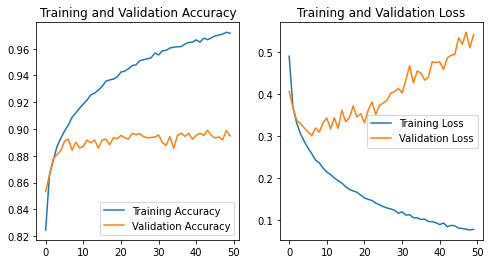

In [34]:
epochs=50

acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs_range= range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()

In [36]:
model_new= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [37]:
model_new.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_new.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [42]:
callback= keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
#Patience- number of epochs with no improvement after which training will be stopped

In [43]:
history = model_new.fit(train_images, train_labels,validation_split=0.2, epochs=50, callbacks=callback, verbose=1)

Epoch 1/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4933 - accuracy: 0.8240 - val_loss: 0.3963 - val_accuracy: 0.8581
Epoch 2/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3686 - accuracy: 0.8652 - val_loss: 0.3558 - val_accuracy: 0.8716
Epoch 3/50
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3286 - accuracy: 0.8780 - val_loss: 0.3433 - val_accuracy: 0.8746
Epoch 4/50
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3058 - accuracy: 0.8856 - val_loss: 0.3630 - val_accuracy: 0.8591
Epoch 5/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2859 - accuracy: 0.8933 - val_loss: 0.3324 - val_accuracy: 0.8808
Epoch 6/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2702 - accuracy: 0.8993 - val_loss: 0.3118 - val_accuracy: 0.8887
Epoch 7/50
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2566 - accuracy: 0.9044 - val_loss: 0.3146 -

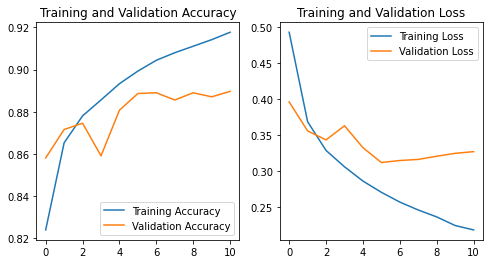

In [46]:
epochs=11

acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs_range= range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()